In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import os

In [2]:
df = pd.read_excel(r"C:\Users\M_KHAIRY\Downloads\Sales.xlsx")

In [3]:
df.head()

,OrderDetailID,OrderID,OrderDate,DueDate,ShipDate,StatusID,Status,OnlineOrderFlag,CustomerID,SalesPersonID,...,ProductID,Product,ProductSubCategory,ProductCategory,OrderQty,UnitPrice,LineTotal,TaxAmt,Freight,TotalDue
0,15,43661,2011-05-31,2011-06-12,2011-06-07,5,Shipped,0,29734,282,...,745,"HL Mountain Frame - Black, 48",Mountain Frames,Components,1,809.7600,809.7600,78.034563,24.385801,912.180364
1,16,43661,2011-05-31,2011-06-12,2011-06-07,5,Shipped,0,29734,282,...,743,"HL Mountain Frame - Black, 42",Mountain Frames,Components,1,714.7043,714.7043,68.874281,21.523213,805.101794
2,17,43661,2011-05-31,2011-06-12,2011-06-07,5,Shipped,0,29734,282,...,747,"HL Mountain Frame - Black, 38",Mountain Frames,Components,2,714.7043,1429.4086,137.748563,43.046426,1610.203589
3,18,43661,2011-05-31,2011-06-12,2011-06-07,5,Shipped,0,29734,282,...,712,AWC Logo Cap,Caps,Clothing,4,5.1865,20.7460,1.999241,0.624763,23.370004
4,19,43661,2011-05-31,2011-06-12,2011-06-07,5,Shipped,0,29734,282,...,715,"Long-Sleeve Logo Jersey, L",Jerseys,Clothing,4,28.8404,115.3616,11.117111,3.474097,129.952808


In [4]:
Dim_OrderDate = df.filter(items=['OrderDate'])
Dim_OrderDate['OrderDate_ID'] = Dim_OrderDate['OrderDate']
Dim_OrderDate['OrderDate_ID'] = Dim_OrderDate['OrderDate_ID'].astype('str')
Dim_OrderDate['OrderDate_ID'] = Dim_OrderDate['OrderDate_ID'].str.replace('-','')
Dim_OrderDate.drop_duplicates(inplace = True)
Dim_OrderDate.reset_index(inplace = True)
Dim_OrderDate.drop('index' , axis = 1 , inplace = True)
Dim_OrderDate.head(3)

,OrderDate,OrderDate_ID
0,2011-05-31,20110531
1,2011-07-01,20110701
2,2011-08-01,20110801


In [6]:
Dim_DueDate = df.filter(items = ['DueDate']  )
Dim_DueDate['DueDate_ID'] = Dim_DueDate['DueDate']
Dim_DueDate['DueDate_ID'] = Dim_DueDate['DueDate_ID'].astype('str')
Dim_DueDate['DueDate_ID'] = Dim_DueDate['DueDate_ID'].str.replace('-','')
Dim_DueDate.drop_duplicates(inplace = True)
Dim_DueDate.head()

,DueDate,DueDate_ID
0,2011-06-12,20110612
108,2011-07-13,20110713
248,2011-08-13,20110813
360,2011-09-12,20110912
487,2011-10-13,20111013


In [7]:
Dim_ShipDate = df.filter(items = ['ShipDate']  )
Dim_ShipDate['ShipDate_ID'] = Dim_ShipDate['ShipDate']
Dim_ShipDate['ShipDate_ID'] = Dim_ShipDate['ShipDate_ID'].astype('str')
Dim_ShipDate['ShipDate_ID'] = Dim_ShipDate['ShipDate_ID'].str.replace('-','')
Dim_ShipDate.drop_duplicates(inplace = True)
Dim_ShipDate.head(2)

,ShipDate,ShipDate_ID
0,2011-06-07,20110607
108,2011-07-08,20110708


In [8]:
Dim_Status = df.filter(items = ['StatusID','Status'])
Dim_Status.drop_duplicates(inplace = True)
Dim_Status.sort_values('StatusID',inplace = True)
Dim_Status.reset_index(inplace = True)
Dim_Status.drop('index',axis = 1 , inplace = True)
Dim_Status

,StatusID,Status
0,1,In process
1,2,Approved
2,3,Backordered
3,4,Rejected
4,5,Shipped
5,6,Cancelled


In [9]:
pd.set_option('display.max.columns',  None)

In [10]:
Dim_Territory = df.filter(items = ['TerritoryID','Territory','TerritoryGroup'])
Dim_Territory.drop_duplicates(inplace = True)
Dim_Territory.sort_values('TerritoryID',inplace = True)
Dim_Territory.reset_index(inplace = True)
Dim_Territory.drop('index' , axis = 1 , inplace = True)
Dim_Territory

,TerritoryID,Territory,TerritoryGroup
0,1,Northwest,North America
1,3,Central,North America
2,4,Southwest,North America
3,6,Canada,North America
4,7,France,Europe
5,8,Germany,Europe
6,9,Australia,Pacific
7,10,United Kingdom,Europe


In [11]:
Dim_ShipMethod = df.filter(items = ['ShipMethodID','ShipMethod'])
Dim_ShipMethod.drop_duplicates(inplace = True)
Dim_ShipMethod.sort_values('ShipMethodID',inplace = True)
Dim_ShipMethod.reset_index(inplace = True)
Dim_ShipMethod.drop('index' , axis = 1 , inplace = True)
Dim_ShipMethod

,ShipMethodID,ShipMethod
0,5,CARGO TRANSPORT 5


In [12]:
Dim_Products = df.filter(items = ['ProductID','Product','ProductSubCategory','ProductCategory'])
Dim_Products.drop_duplicates(inplace = True)
Dim_Products.sort_values('ProductID',inplace = True)
Dim_Products.reset_index(inplace = True)
Dim_Products.drop('index' , axis = 1 , inplace = True)
Dim_Products

,ProductID,Product,ProductSubCategory,ProductCategory
0,707,"Sport-100 Helmet, Red",Helmets,Accessories
1,708,"Sport-100 Helmet, Black",Helmets,Accessories
2,709,"Mountain Bike Socks, M",Socks,Clothing
3,710,"Mountain Bike Socks, L",Socks,Clothing
4,711,"Sport-100 Helmet, Blue",Helmets,Accessories
...,...,...,...,...
245,994,LL Bottom Bracket,Bottom Brackets,Components
246,996,HL Bottom Bracket,Bottom Brackets,Components
247,997,"Road-750 Black, 44",Road Bikes,Bikes
248,998,"Road-750 Black, 48",Road Bikes,Bikes


In [13]:
df.head(2)
df.drop(columns = ['Status','Territory','TerritoryGroup','ShipMethod','Product','ProductSubCategory','ProductCategory'] , inplace = True)
df.head(2)

,OrderDetailID,OrderID,OrderDate,DueDate,ShipDate,StatusID,OnlineOrderFlag,CustomerID,SalesPersonID,TerritoryID,ShipMethodID,ProductID,OrderQty,UnitPrice,LineTotal,TaxAmt,Freight,TotalDue
0,15,43661,2011-05-31,2011-06-12,2011-06-07,5,0,29734,282,6,5,745,1,809.7600,809.7600,78.034563,24.385801,912.180364
1,16,43661,2011-05-31,2011-06-12,2011-06-07,5,0,29734,282,6,5,743,1,714.7043,714.7043,68.874281,21.523213,805.101794


In [14]:
df['OrderDate'] = df['OrderDate'].astype('str')
df['OrderDate'] = df['OrderDate'].str.replace('-','')
df['OrderDate']

0        20110531
1        20110531
2        20110531
3        20110531
4        20110531
           ...   
23598    20140501
23599    20140501
23600    20140501
23601    20140501
23602    20140501
Name: OrderDate, Length: 23603, dtype: object

In [15]:
df['DueDate'] = df['DueDate'].astype('str')
df['DueDate'] = df['DueDate'].str.replace('-','')
df['DueDate']

0        20110612
1        20110612
2        20110612
3        20110612
4        20110612
           ...   
23598    20140513
23599    20140513
23600    20140513
23601    20140513
23602    20140513
Name: DueDate, Length: 23603, dtype: object

In [16]:
df['ShipDate'] = df['ShipDate'].astype('str')
df['ShipDate'] = df['ShipDate'].str.replace('-','')
df['ShipDate']

0        20110607
1        20110607
2        20110607
3        20110607
4        20110607
           ...   
23598    20140508
23599    20140508
23600    20140508
23601    20140508
23602    20140508
Name: ShipDate, Length: 23603, dtype: object

In [17]:
df.head()
#df['OnlineOrderFlag'].nunique()

,OrderDetailID,OrderID,OrderDate,DueDate,ShipDate,StatusID,OnlineOrderFlag,CustomerID,SalesPersonID,TerritoryID,ShipMethodID,ProductID,OrderQty,UnitPrice,LineTotal,TaxAmt,Freight,TotalDue
0,15,43661,20110531,20110612,20110607,5,0,29734,282,6,5,745,1,809.7600,809.7600,78.034563,24.385801,912.180364
1,16,43661,20110531,20110612,20110607,5,0,29734,282,6,5,743,1,714.7043,714.7043,68.874281,21.523213,805.101794
2,17,43661,20110531,20110612,20110607,5,0,29734,282,6,5,747,2,714.7043,1429.4086,137.748563,43.046426,1610.203589
3,18,43661,20110531,20110612,20110607,5,0,29734,282,6,5,712,4,5.1865,20.7460,1.999241,0.624763,23.370004
4,19,43661,20110531,20110612,20110607,5,0,29734,282,6,5,715,4,28.8404,115.3616,11.117111,3.474097,129.952808


In [18]:
df.rename(columns = {'DueDate':'DueDate_ID' , 'ShipDate':'ShipDate_ID','OrderDate':'OrderDate_ID'} , inplace = True)

In [19]:
df.rename(columns = {'LineTotal':'Net Profit' ,'TotalDue':'Total Sales' } , inplace = True)

In [20]:
1 * 809.7600 + 78.034563 + 24.385801

912.180364

In [21]:
df[['OrderQty','UnitPrice','Net Profit','TaxAmt','Freight','Total Sales']].describe()

,OrderQty,UnitPrice,Net Profit,TaxAmt,Freight,Total Sales
count,23603.000000,23603.000000,23603.000000,23603.000000,23603.000000,23603.000000
mean,3.637927,424.655771,1274.689385,124.183233,38.807260,1437.679879
std,3.092217,499.906322,2048.100684,200.345887,62.608090,2310.758916
min,1.000000,1.328200,1.374000,0.131496,0.041093,1.546589
25%,2.000000,32.394000,125.964000,11.942716,3.732099,141.156562
50%,3.000000,202.332000,445.410000,42.759350,13.362298,501.327029
75%,5.000000,647.994000,1457.820000,140.209944,43.815608,1641.239950
max,41.000000,2146.962000,23667.854925,2546.647770,795.827420,26730.124907


In [23]:
mg_terr = Dim_Territory.merge(df[[ 'TerritoryID','OrderQty',	'UnitPrice'	,'Net Profit',	'TaxAmt'	,'Freight'	,'Total Sales']] , how = 'inner' )
terr_sales = mg_terr.groupby('Territory')['Total Sales'].sum().sort_values()


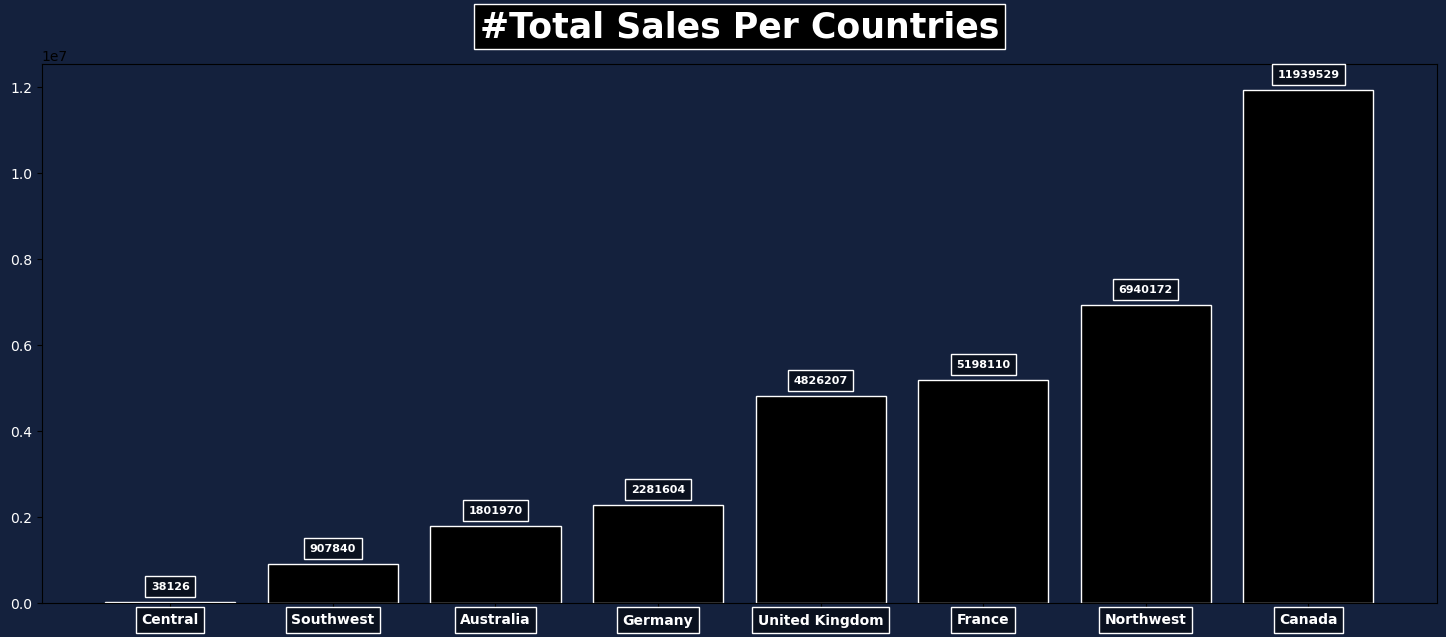

In [24]:
plt.figure(figsize = (18 , 7) , facecolor = '#14213d')
ax = plt.gca()
ax.set_facecolor('#14213d')
plt.bar(terr_sales.index , terr_sales.values , color = '#000000' , edgecolor = 'w' )
#plt.plot(terr_sales , marker = 'o' , markersize = 10)
plt.title('#Total Sales Per Countries' , pad = 20 , fontsize = 25 , weight = 'bold' , c = 'w',
         bbox = dict(facecolor = '#000000' , edgecolor = 'w') )
plt.xticks(weight = 'bold' , rotation = 0 , c = 'w' ,bbox = dict(facecolor = '#0a111f' , edgecolor = 'w') )
plt.yticks(c = 'w')
up = 0.03 * max(terr_sales.values)
for ind , v in zip(terr_sales.index , terr_sales.values) :
    plt.text(ind , v + up ,f'{v:.0f}' , ha = 'center' , va = 'center' , fontsize = 8, weight = 'bold', c = 'w',
            bbox = dict(facecolor = '#0a111f' , edgecolor = 'w'))
plt.show()

In [25]:
mg_status = Dim_Status.merge(df[['StatusID','Total Sales']] , how = 'inner')
plt_status= mg_status.groupby('Status')['Total Sales'].sum().sort_values()

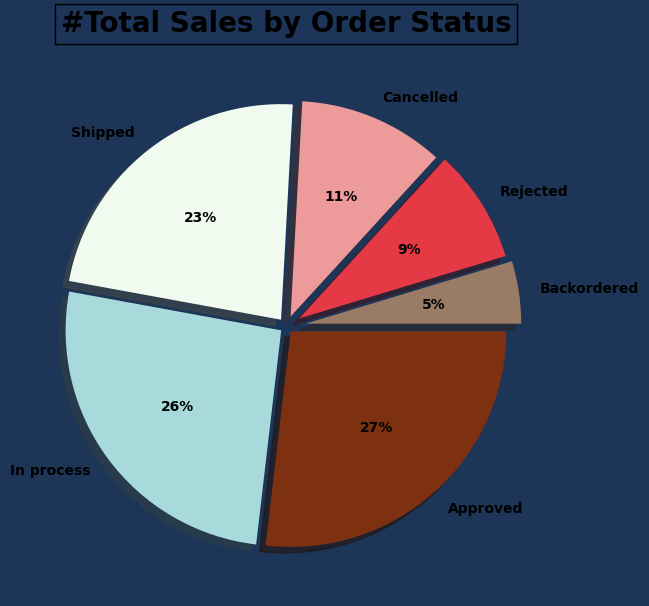

In [26]:
plt.figure(figsize = (7 , 7) , facecolor = '#1d3557')
plt.pie(plt_status , labels = plt_status.index , shadow = True ,
       colors = ['#997b66','#e63946','#ec9a9a','#f1faee','#a8dadc','#7e3110'] ,
       explode = [0.09,0.07,0.05,0.04,0.03,0.03] ,
       autopct = '%.0f%%' ,textprops={'fontsize': 10, 'color': 'black', 'fontweight': 'bold'}  )
plt.title('#Total Sales by Order Status' , pad = 18 , weight = 'bold' , fontsize = 20 ,
         bbox = dict(facecolor = '#1d3559' , edgecolor = 'black' ))
#plt.legend()
plt.show()

In [27]:
mg_products = Dim_Products.merge(df[['ProductID','Total Sales']])
plt_prod    = mg_products.groupby('ProductCategory')['Total Sales'].sum().sort_values(ascending = False)
plt_subprod = mg_products.groupby('ProductSubCategory')['Total Sales'].sum().sort_values()
top_sub = plt_subprod.sort_values(ascending = False).head(10)
top_sub = top_sub.sort_values()

In [28]:
top_product = mg_products.groupby('Product')['Total Sales'].sum().sort_values(ascending = False).head(10)
top_product = top_product.sort_values()

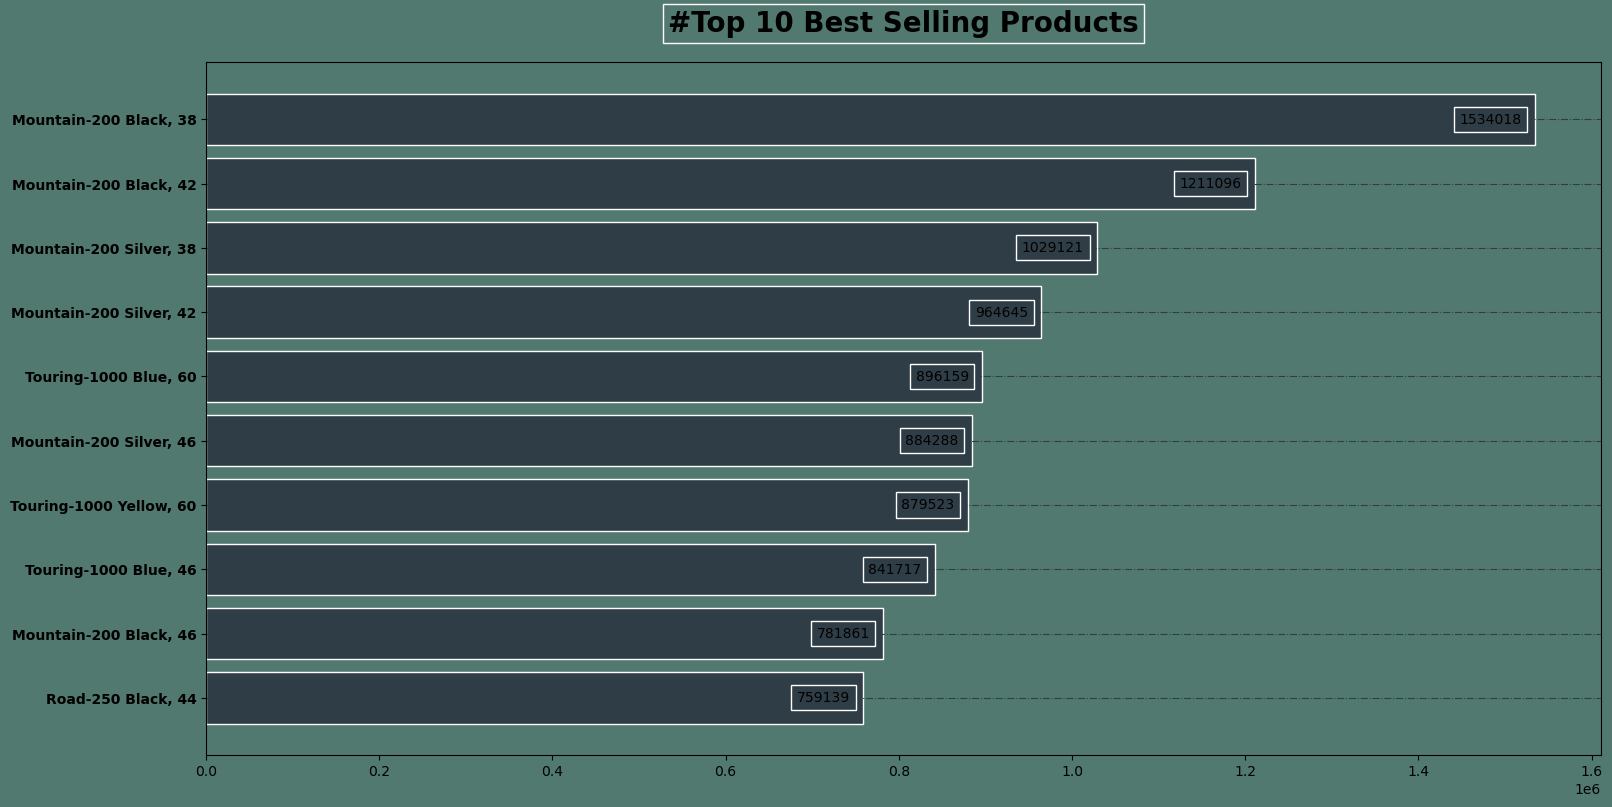

In [29]:
plt.figure(figsize = (18 , 9) , facecolor = '#52796f')
ax = plt.gca()
ax.set_facecolor('#52796f')
plt.barh(top_product.index , top_product.values , edgecolor = 'w' , color=  '#2f3e46')
plt.title('#Top 10 Best Selling Products'  , pad = 22 , fontsize = 20 , weight = 'bold' , 
         bbox = dict(facecolor = '#52796f',edgecolor = 'w'))
off = 0.01 * max(top_product.values)
for ind  , v in zip (top_product.index , top_product.values) :
    plt.text(v -  off , ind ,f'{v:.0f}' , ha = 'right' , va= 'center' ,
            bbox = dict(facecolor = '#2f3e46' , edgecolor = 'w'))
plt.grid(axis = 'y' , c = '#2f3e46' , linestyle = '-.')
plt.yticks(weight = 'bold')
plt.show()

In [30]:
mg_due = Dim_DueDate.merge(df[['DueDate_ID','Total Sales']])
plt_due = mg_due.groupby(mg_due['DueDate'].dt.year)['Total Sales'].sum()

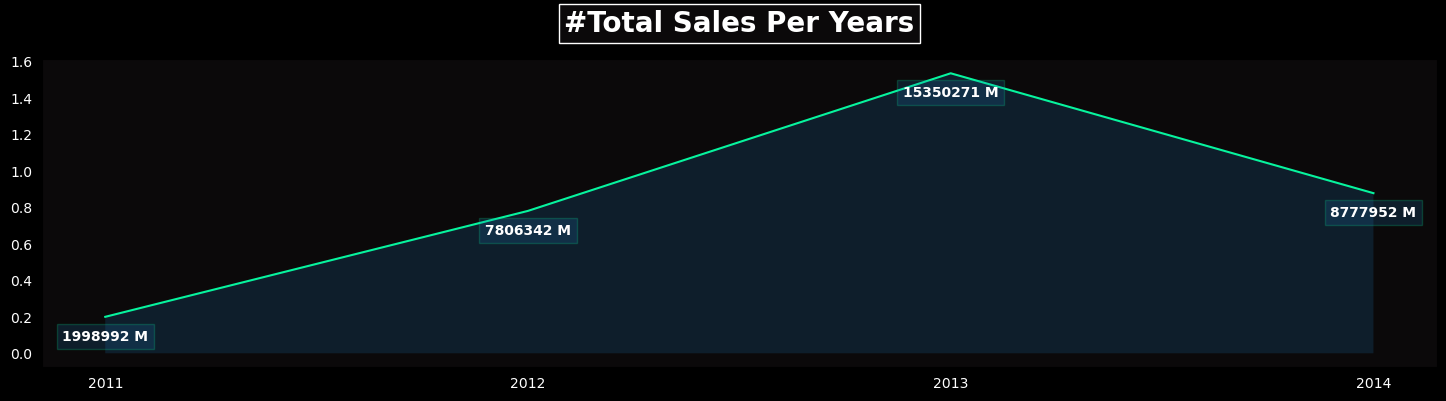

In [31]:
plt.figure(figsize = (18,4) , facecolor = '#000000')
ax = plt.gca()
ax.set_facecolor('#0b090a')
plt.plot(plt_due.index,plt_due.values , color=  '#07f49e')
plt.xticks(plt_due.index , c = 'w')
plt.yticks(c = 'w')
plt.title('#Total Sales Per Years' , pad = 20 , weight = 'bold' , fontsize = 20  , c = 'w' ,
         bbox = dict(facecolor = '#0b090a' , edgecolor = 'w'))
plt.fill_between(plt_due.index,plt_due.values , alpha = 0.2)
off = 0.07 * max(plt_due.values)
for ind , v in zip(plt_due.index,plt_due.values) :
    plt.text(ind , v - off , f'{v:.0f} M' , ha = 'center' , va = 'center' ,weight = 'bold' ,c = 'w', 
            bbox = dict(  edgecolor = '#07f49e' , alpha = 0.2))
plt.show()

In [32]:
sales2011 = mg_due[mg_due['DueDate'].dt.year == 2011]
plt2011 = sales2011.groupby(sales2011['DueDate'].dt.month)['Total Sales'].sum()
#------------
sales2012 = mg_due[mg_due['DueDate'].dt.year == 2012]
plt2012 = sales2012.groupby(sales2012['DueDate'].dt.month)['Total Sales'].sum()
#------------
sales2013 = mg_due[mg_due['DueDate'].dt.year == 2013]
plt2013 = sales2013.groupby(sales2013['DueDate'].dt.month)['Total Sales'].sum()
#------------
sales2014 = mg_due[mg_due['DueDate'].dt.year == 2014]
plt2014 = sales2014.groupby(sales2014['DueDate'].dt.month)['Total Sales'].sum()

In [33]:
import calendar
month_names = [calendar.month_abbr[i] for i in plt2013.index] 
month_names

['Jan',
 'Feb',
 'Mar',
 'Apr',
 'May',
 'Jun',
 'Jul',
 'Aug',
 'Sep',
 'Oct',
 'Nov',
 'Dec']

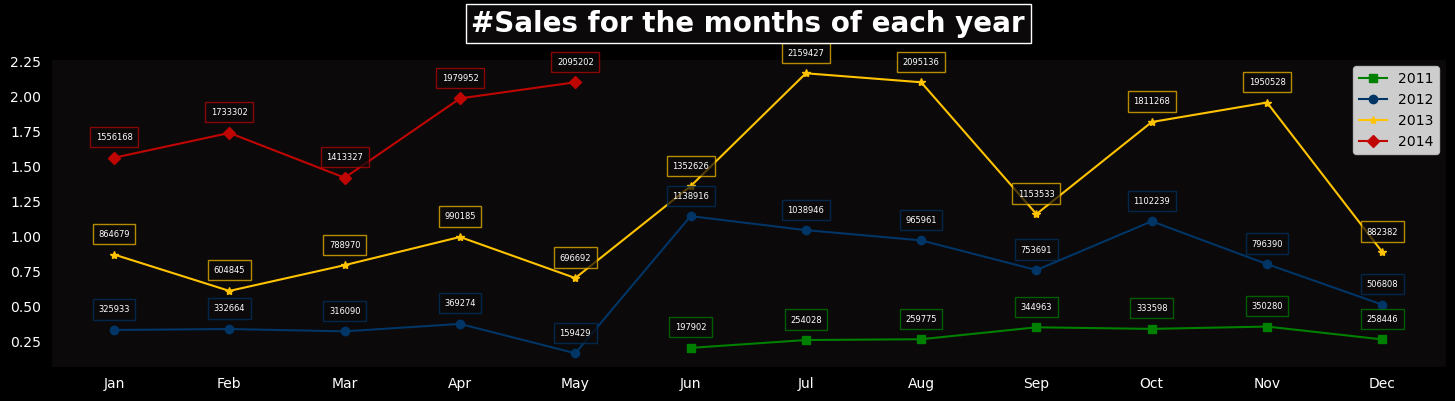

In [34]:
plt.figure(figsize = (18 , 4) ,facecolor = '#000000')
ax = plt.gca()
ax.set_facecolor('#0b090a')
plt.plot(plt2011 , label = '2011' , marker = 's' , color = '#008000')
plt.plot(plt2012 , label = '2012' , marker = 'o', color = '#003566')
plt.plot(plt2013 , label = '2013' , marker = '*', color = '#ffc300')
plt.plot(plt2014 , label = '2014' , marker = 'D', color = '#bf0603')
plt.xticks(plt2013.index ,labels =  month_names , c = 'w')
plt.yticks(c = 'w')
plt.title('#Sales for the months of each year' , pad = 20 , weight = 'bold' , fontsize = 20 , c = 'w' ,
         bbox = dict(facecolor = '#0b090a' , edgecolor = 'w'))
#-----
up1 = 0.07 * max(plt2014.values)
for ind , v in zip(plt2014.index,plt2014.values) :
    plt.text(ind ,v + up1 ,f'{v:.0f}'  , c = 'w' , ha = 'center',va = 'center' , bbox = dict(facecolor = '#0b090a' , alpha = 0.7 ,
                                                                                            edgecolor = '#bf0603') , fontsize = 6)
#-----
up2 = 0.07 * max(plt2013.values)
for ind , v in zip(plt2013.index,plt2013.values) :
    plt.text(ind ,v + up1 ,f'{v:.0f}'  , c = 'w' , ha = 'center',va = 'center' , bbox = dict(facecolor = '#0b090a' , alpha = 0.7 ,
                                                                                     edgecolor = '#ffc300') , fontsize = 6)
#-----
up3 = 0.07 * max(plt2012.values)
for ind , v in zip(plt2012.index,plt2012.values) :
    plt.text(ind ,v + up1 ,f'{v:.0f}'  , c = 'w' , ha = 'center',va = 'center' , bbox = dict(facecolor = '#0b090a' , alpha = 0.7 ,
                                                                                     edgecolor = '#003566') , fontsize = 6)
#-----
up4 = 0.07 * max(plt2011.values)
for ind , v in zip(plt2011.index,plt2011.values) :
    plt.text(ind ,v + up1 ,f'{v:.0f}'  , c = 'w' , ha = 'center',va = 'center' , bbox = dict(facecolor = '#0b090a' , alpha = 0.7 ,
                                                                                     edgecolor = '#008000') , fontsize = 6)
plt.legend()
plt.show()

In [35]:
os.getcwd()

'C:\\Users\\M_KHAIRY'